Моделирование временных рядов
Моделирование временных рядов. Детерминистические модели. Основные типы
трендов.
Модели
сезонности.
Регулярные
и
нерегулярные
события.
Стохастические
модели
временных
рядов.
Понятие
белый
гауссов
шум.
Нестационарные шумы. Модель временного ряда со случайным блужданием.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(16, 4)})

Детерминированные модели
Модель временного ряда
Простейшим
случаем
детерминированного
временного
одномерная
(одномерная)
зависимость
значения
от
времени,
следующей форме
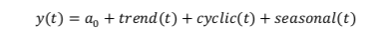


где

y(t) - это временной ряд - набор выборок, проиндексированных некоторой
переменной , обычно – это временные отметки, если временной шаг дискретный,
он также может быть обозначен как n (номер выборки), в этом случае в реальном
времени - значение шага будет соответствовать = ⋅ , где - период шага n
(период дискретизации, с которым берутся отсчеты).



0 - некоторый начальный постоянный уровень,

- это наличие некоторого тренда, который является частью зависимости с
медленным изменением.



- это сезонность или некоторые «относительно быстро изменяющиеся»
периодические составляющие - это относительно быстро меняющаяся часть
взаимосвязи.



- это некоторые периодические компоненты с "относительно медленным
изменением" с нерегулярным периодом и относительно высокой интенсивностью.



Часто в тренд включаются циклическая и 0 части, в этом случае модель может быть
задана как
image.png

Trend investigation
Сначала промоделируем временной ряд как имеющий только линейный тренд, взятый с
единым периодом выборки.

In [3]:
np.arange(20,100)

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

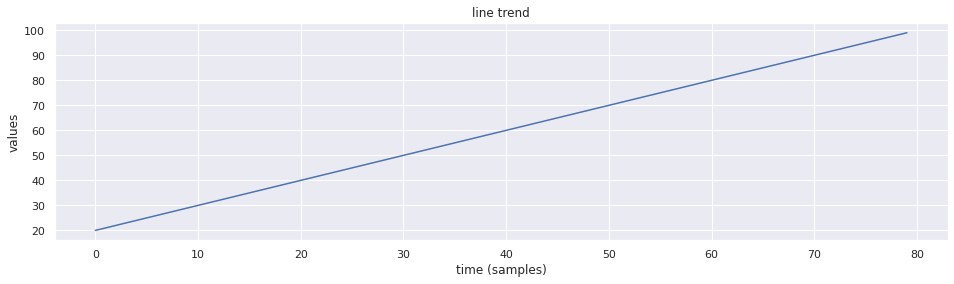

In [2]:
ts = np.arange(20,100)
fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='time (samples)', ylabel='values',
title='line trend')
plt.show()

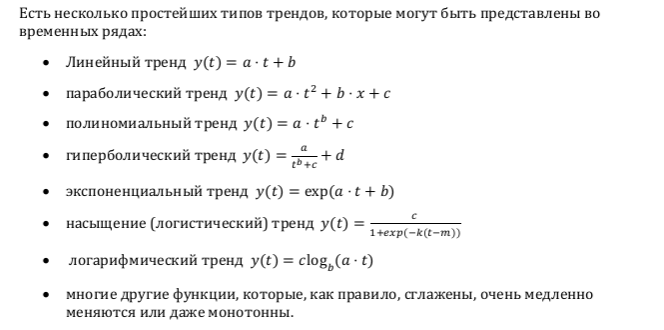

Теперь мы можем попробовать логарифмический тренд с основанием ( Число Эйлера,
натуральный логарифм) и = 4

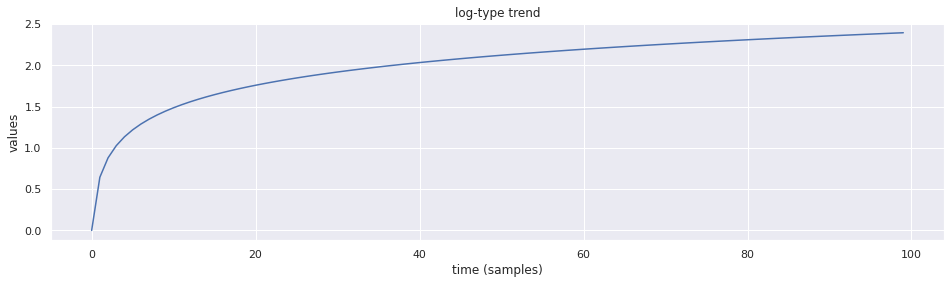

In [4]:
N_OF_SAMPLES=100 # Number of samples
a = 4#const
c = 0.4
n = np.arange(N_OF_SAMPLES)
ts = c*np.log(1+a*(n))
fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='time (samples)', ylabel='values',
title='log-type trend')
plt.show()

Для многих реальных временных рядов кусочно-монотонное поведение является
естественным, поэтому часто необходимо моделировать кусочно-монотонный тренд с
одной или несколькими точками перегиба.

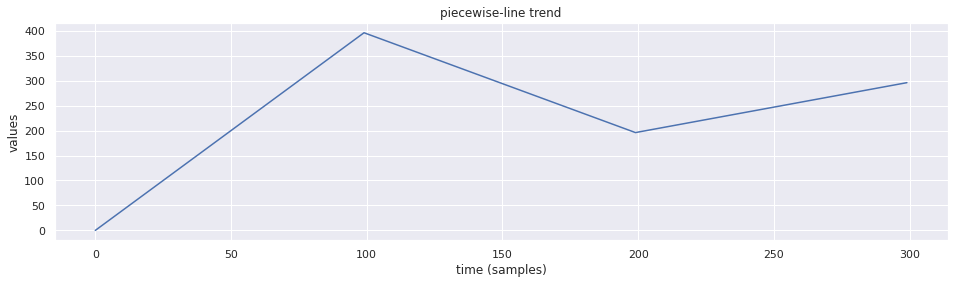

In [5]:
N_OF_SAMPLES=100 # Number of samples
a = 4#const
n = np.arange(N_OF_SAMPLES)
ts1 =a*n
a = 2#const
n = np.arange(1,N_OF_SAMPLES+1)
ts2 = ts1[-1]-a*n
a = 1#const
n = np.arange(1,N_OF_SAMPLES+1)
ts3 = ts2[-1]+a*n
ts = np.concatenate((ts1,ts2,ts3))
fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='time (samples)',
ylabel='values',
title='piecewise-line trend')
plt.show()

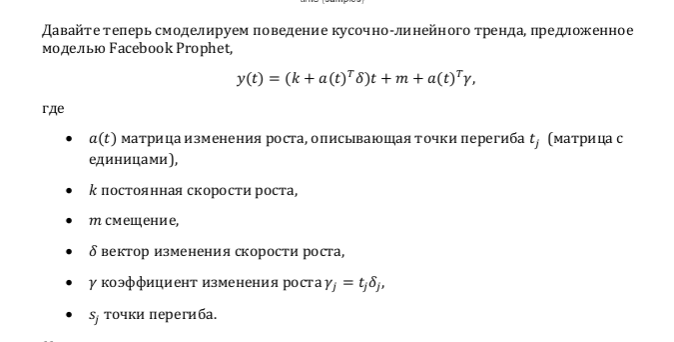

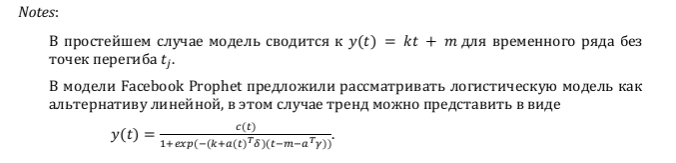

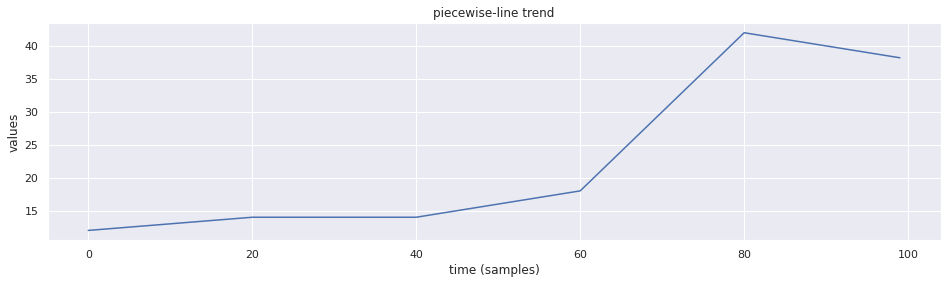

In [7]:
N_OF_SAMPLES=100 # Number of samples
k = 0.1
m = 12
n = np.arange(N_OF_SAMPLES)
inflection_points = np.array([20, 40, 60, 80])#change points
a = np.zeros(shape=(inflection_points.size, N_OF_SAMPLES)) # the matrix of growth changing
# fill matrix
# n[:,None] -mean add new dimention,
#(n[:,None] > inflection_points) is the logic operation to fill matrixwith false, true
#(n[:,None] > inflection_points)*1 prodece 1 for true and 0 for false
a = ((n[:,None] > inflection_points) * 1).T
delta = np.array([-0.1, 0.2, 1, -1.4])#vector with growth rate adjustments
growth = (k + np.dot(a.T,delta))
gamma = -inflection_points * delta
offset = m + np.dot(a.T,gamma)
ts = growth* n + offset
fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='time (samples)',
ylabel='values',
title='piecewise-line trend')
plt.show()

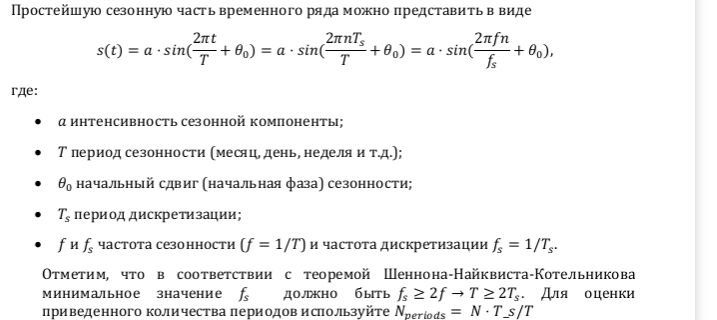

number of periods =  3.0


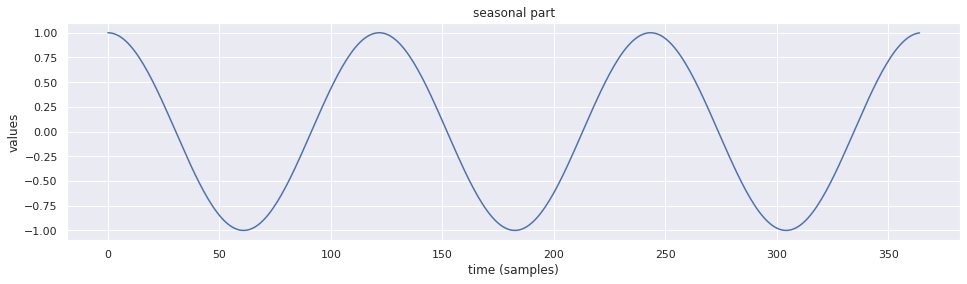

In [8]:
N_OF_SAMPLES=365 # Number of samples
n = np.arange(N_OF_SAMPLES)
a = 1
Ts = 1/365
T =1/3
theta = np.pi/2
print('number of periods = ',N_OF_SAMPLES*Ts/T)
ts = a*np.sin(2*np.pi*n*Ts/T+theta)
fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='time (samples)',
ylabel='values',
title='seasonal part')
plt.show()


Теперь давайте смоделируем более сложную сезонность в году, например, месяц и
неделю, которые мы сделаем аддитивно, так что:


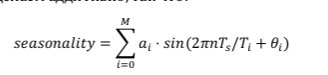

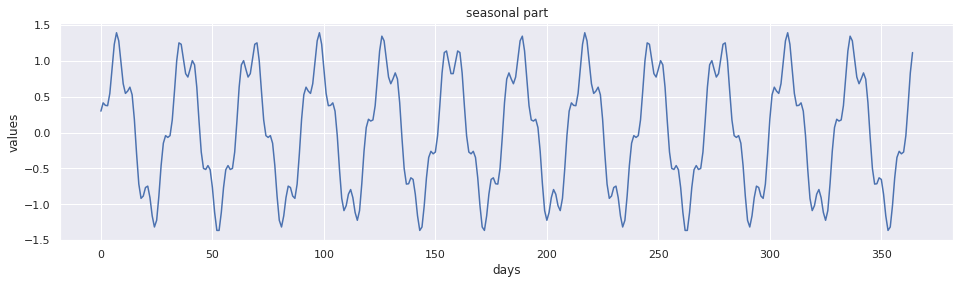

In [9]:
N_OF_DAYS=365# Number of samples
days = np.arange(N_OF_DAYS)
a_w = 0.3 #weak influence
a_m = 1.1 #month influence
T_w = 7/365
T_m = 30/365
Ts = 1/365
theta_w = np.pi/2
theta_m = 0
ts = a_w*np.sin(2*np.pi*days*Ts/T_w + theta_w)+a_m*np.sin(2*np.pi*days*Ts/
T_m + theta_m)
fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='days',
ylabel='values',
title='seasonal part')
plt.show()

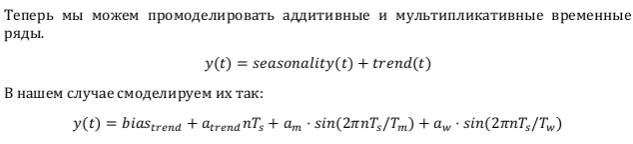

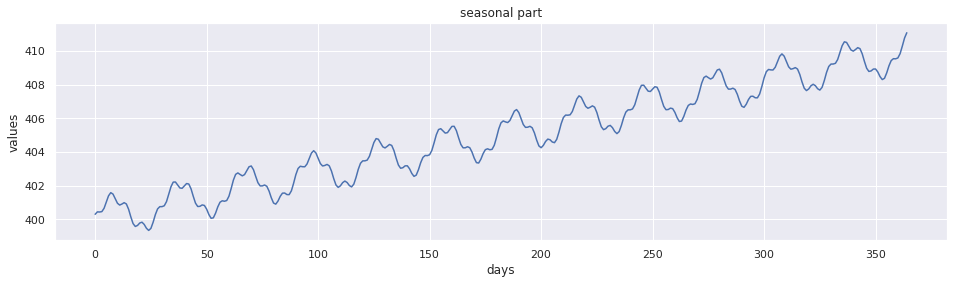

In [10]:
YEAR = 365
WEEK = 7
MONTH = 30
N_OF_DAYS=YEAR# Number of samples
days = np.arange(N_OF_DAYS)
a_w = 0.3 #weak influence
a_m = 1.1 #month influence
T_w = WEEK/YEAR
T_m = MONTH/YEAR
Ts = 1/YEAR
theta_w = np.pi/2
theta_m = 0
a_trend = 10 #slope
bias_trend = 400
trend = a_trend*days*Ts+bias_trend
seasonality = a_w*np.sin(2*np.pi*days*Ts/T_w + theta_w)+a_m*np.sin(2*np.pi
*days*Ts/T_m + theta_m)
ts =trend + seasonality
fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='days',
ylabel='values',
title='seasonal part')
plt.show()

Циклическая часть


Помимо тренда и сезонности, мы можем добавить некоторую цикличность
(в качестве альтернативы можно рассматривать как медленное изменение тренда).
Давайте смоделируем цикличность как некоторую зависимость год-сезон, например, в
приведенном ниже примере мы моделируем падение продаж в середине года (летом).

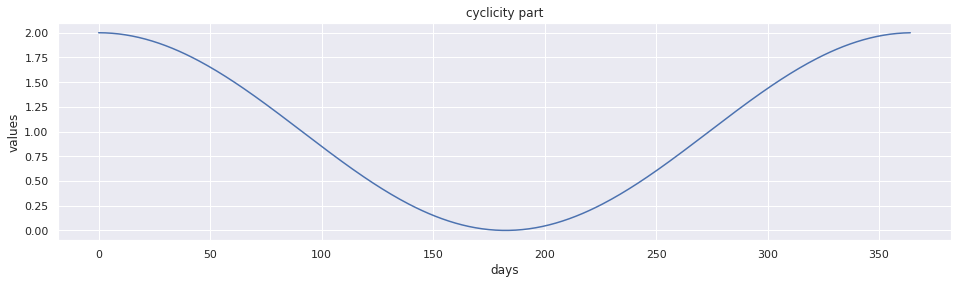

In [11]:
a_cycl = 1
T_cycl = 1
cyclicity = a_cycl +a_cycl *np.sin(2*np.pi*days*Ts/T_cycl + np.pi/2)
ts =cyclicity
fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='days',
ylabel='values',
title='cyclicity part')
plt.show()

Теперь можем добавить это к тренду

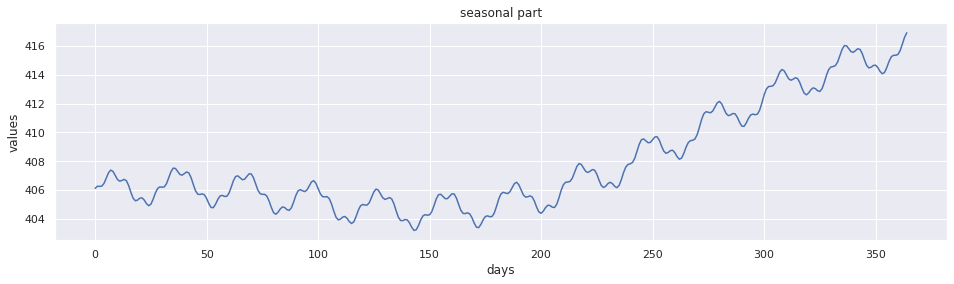

In [13]:
YEAR = 365
WEEK = 7
MONTH = 30
N_OF_DAYS=YEAR# Number of samples
days = np.arange(N_OF_DAYS)
a_w = 0.3 #weak influence
a_m = 1.1 #month influence
T_w = WEEK/YEAR
T_m = MONTH/YEAR
Ts = 1/YEAR
theta_w = np.pi/2
theta_m = 0
a_trend = 10 #slope
bias_trend = 400
trend = a_trend*days*Ts+bias_trend
seasonality = a_w*np.sin(2*np.pi*days*Ts/T_w + theta_w)+a_m*np.sin(2*np.pi
*days*Ts/T_m + theta_m)
a_cycl = 2.91
T_cycl = 1
cyclicity = a_cycl+a_cycl *np.sin(2*np.pi*days*Ts/T_cycl + np.pi/2)
ts =trend + seasonality + cyclicity
fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='days',
ylabel='values',
title='seasonal part')
plt.show()

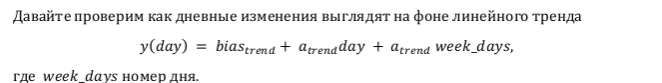

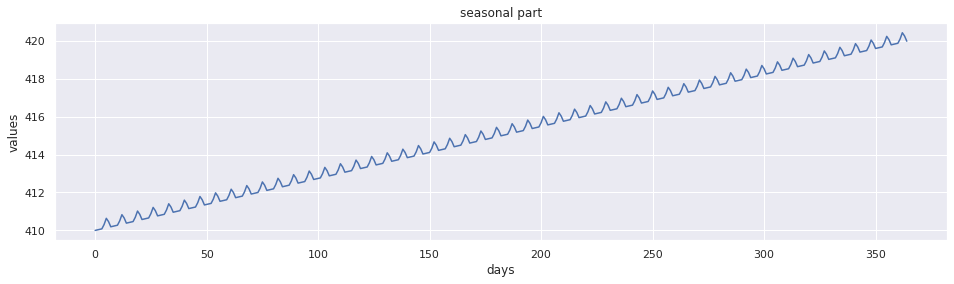

In [14]:
N_OF_DAYS = 365
days = np.arange(N_OF_SAMPLES)
a_trend = 10 #slope
bias_trend = 400
week_coefficients = np.array([1, 1, 1, 1, 1.02, 1.05, 1.03])
a_week = week_coefficients*a_trend
week_days = np.array([*list(a_week)*int(N_OF_DAYS/7), *a_week[:N_OF_DAYS%7
]])
trend = a_trend*n*Ts+bias_trend
ts =week_days + trend
fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='days',
ylabel='values',
title='seasonal part')
plt.show()

Теперь добавим сезонную часть.

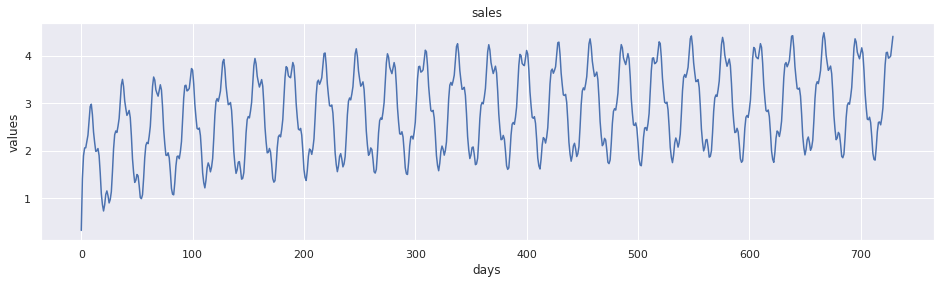

In [15]:
YEAR = 365
WEEK = 7
MONTH = 30
N_OF_DAYS=YEAR*2# Number of samples
days = np.arange(N_OF_DAYS)
a_w = 0.3 #weak influence
a_m = 1.1 #month influence
T_w = WEEK/YEAR
T_m = MONTH/YEAR
Ts = 1/YEAR
a_trend = 5
c_trend = 0.34
week_coefficients = np.array([0.95, 1, 1, 1, 1, 1.25, 1.03])
a_week = week_coefficients*c_trend

trend = c_trend*np.log(1+a_trend*days)
seasonality = a_w*np.sin(2*np.pi*days*Ts/T_w )+a_m*np.sin(2*np.pi*days*Ts/T_m
)
week_days = np.array([*list(a_week)*int(N_OF_DAYS/7), *a_week[:N_OF_DAYS%7]])
ts = week_days + trend + seasonality
fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='days',
ylabel='values',
title='sales')
plt.show()

Симуляция случайного поведения

Белый гауссов шум


Помимо детерминированной части временного ряда, полезно смоделировать его
стохастическое поведение. Стохастическое поведение временного ряда, в первую
очередь связанное с влиянием шума. Самая простая и наиболее распространенная
модель шума - это белый гауссовский шум (WGN) (почти что тоже самое, что и модели
независимого и одинаково распределенного (i.i.d) шума). WGN имеет нормальное
распределение с нулевым средним значением и дисперсией 2:

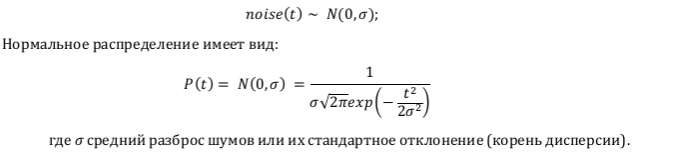

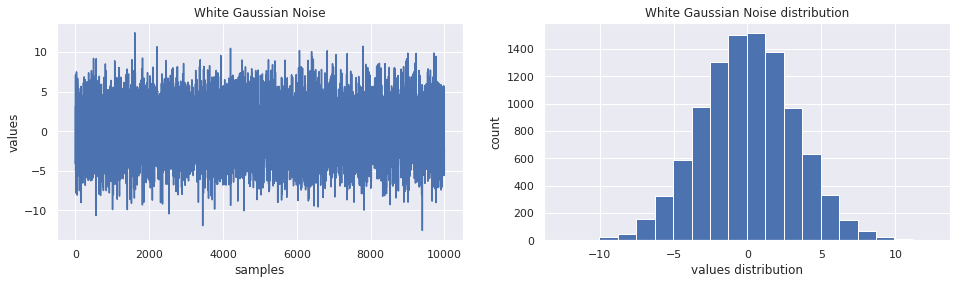

In [16]:
N_OF_SAMPLES = 10000
noise_power = 10
wgn = np.sqrt(noise_power)*np.random.normal(size = N_OF_SAMPLES)
ts = wgn
fig, ax = plt.subplots(1,2)
ax[0].plot(ts)
ax[0].set(xlabel='samples',
ylabel='values',
title='White Gaussian Noise')
ax[1].hist(ts, bins = 20)
ax[1].set(xlabel='values distribution',
ylabel='count',
title='White Gaussian Noise distribution')
plt.show()

Теперь посмотрим на влияние шумов на временной ряд

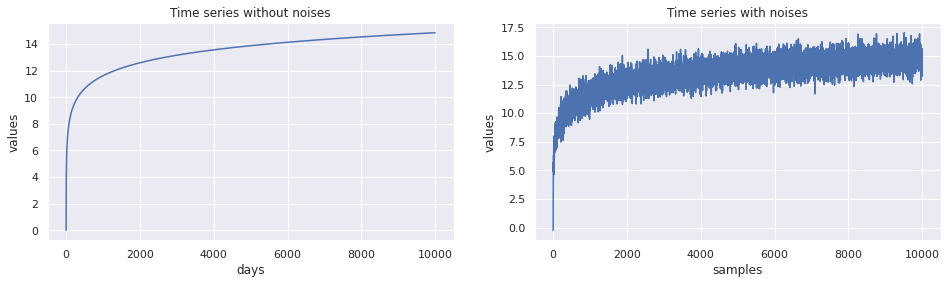

In [17]:
N_OF_SAMPLES = 10000
noise_power = 0.5
wgn = (np.sqrt(noise_power))*(np.random.normal(size = N_OF_SAMPLES))
a = 4#const
c = 1.4
n = np.arange(N_OF_SAMPLES)
ts = c*np.log(1+a*(n))
ts_wn = ts + wgn
fig, ax = plt.subplots(1,2)
ax[0].plot(ts)
ax[0].set(xlabel='days',
ylabel='values',
title='Time series without noises')
ax[1].plot(ts_wn)
ax[1].set(xlabel='samples',
ylabel='values',
title='Time series with noises')
plt.show()

Помимо равномерно распределенного шума, соответствующего стационарной модели
шума, важно моделировать нестационарные случаи. Самый простой случай - это линей
но возрастающая дисперсия,

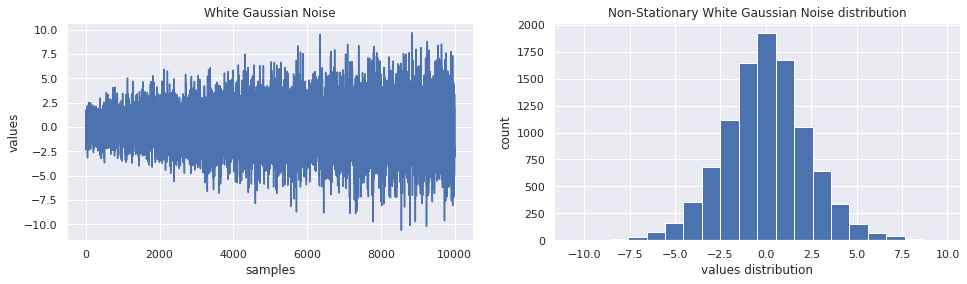

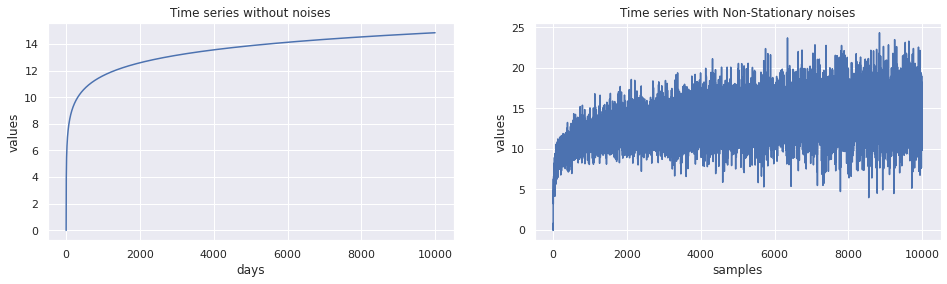

In [18]:
N_OF_SAMPLES = 10000
a = 4#const
c = 1.4
noise_power = np.linspace(1,10,N_OF_SAMPLES) #linearly growing noise power
wgn = np.sqrt(noise_power)*np.random.normal(size = N_OF_SAMPLES)
ts = c*np.log(1+a*np.arange(N_OF_SAMPLES))
ts_wn = ts + wgn
fig, ax = plt.subplots(1,2)
ax[0].plot(wgn)
ax[0].set(xlabel='samples',
ylabel='values',
title='White Gaussian Noise')
ax[1].hist(wgn, bins = 20)
ax[1].set(xlabel='values distribution',
ylabel='count',
title='Non-Stationary White Gaussian Noise distribution')
fig, ax = plt.subplots(1,2)
ax[0].plot(ts)
ax[0].set(xlabel='days',
ylabel='values',
title='Time series without noises')
ax[1].plot(ts_wn)
ax[1].set(xlabel='samples',
ylabel='values',
title='Time series with Non-Stationary noises')
plt.show()

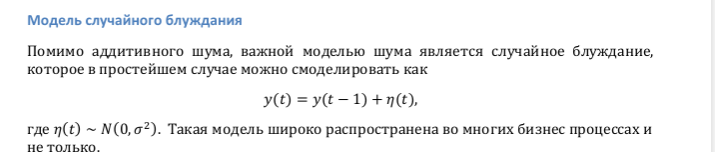

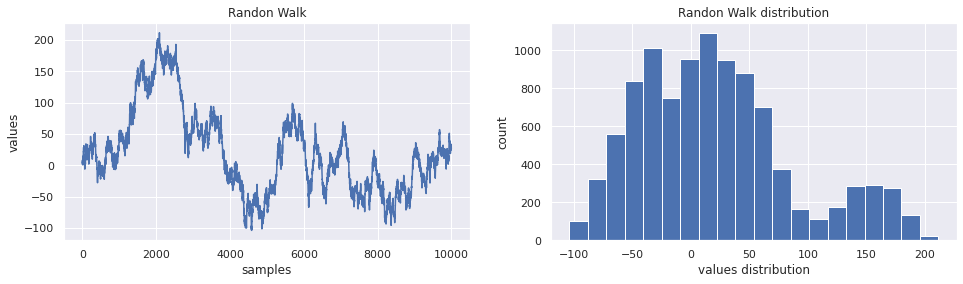

In [19]:
N_OF_SAMPLES = 10000
noise_power = 10
wgn = np.sqrt(noise_power)*np.random.normal(size = N_OF_SAMPLES)
ts = np.cumsum(wgn )
fig, ax = plt.subplots(1,2)
ax[0].plot(ts)
ax[0].set(xlabel='samples',
ylabel='values',
title='Randon Walk')
ax[1].hist(ts, bins = 20)
ax[1].set(xlabel='values distribution',
ylabel='count',
title='Randon Walk distribution')
plt.show()